In [19]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Resizing, Rescaling, RandomFlip, RandomRotation, RandomZoom, RandomContrast, RandomBrightness
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import numpy as np
from PIL import Image

In [20]:
# Constants
IMAGE_SIZE = 256
BATCH_SIZE = 16
SAVE_PATH = r"C:\Users\yenul\OneDrive\Desktop\DSGP project yoga\Processed_Dataset"
TRAIN_SAVE_PATH = os.path.join(SAVE_PATH, "train")
TEST_SAVE_PATH = os.path.join(SAVE_PATH, "test")

# Create necessary directories
os.makedirs(TRAIN_SAVE_PATH, exist_ok=True)
os.makedirs(TEST_SAVE_PATH, exist_ok=True)


In [21]:
dataset_path = r"E:\New Downlods\Yoga_final_dataset"

In [22]:
# Augmentation and Normalization Layers
resize_and_rescale = tf.keras.Sequential([
    Resizing(IMAGE_SIZE, IMAGE_SIZE),
    Rescaling(1.0 / 255)
])

data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal_and_vertical"),
    RandomRotation(0.2)
])

In [23]:
# Load the full dataset first with normalization and augmentation
full_dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    shuffle=True,
    seed=123
)

Found 3595 files belonging to 7 classes.


In [24]:
# Get class names (pose names) before applying any transformations
class_names = full_dataset.class_names
print("Classes:", class_names)

Classes: ['Downdog', 'Goddess', 'Mountain', 'Plank', 'Tree', 'Warrior1', 'Warrior2']


In [25]:
# Apply augmentation and normalization to the whole dataset
full_dataset = full_dataset.map(lambda x, y: (resize_and_rescale(data_augmentation(x)), y))


In [26]:
# Split into train and test sets
train_size = int(0.8 * len(full_dataset))
train_set = full_dataset.take(train_size)
test_set = full_dataset.skip(train_size)

In [27]:
# Create folders for each class
for class_name in class_names:
    os.makedirs(os.path.join(TRAIN_SAVE_PATH, class_name), exist_ok=True)
    os.makedirs(os.path.join(TEST_SAVE_PATH, class_name), exist_ok=True)

In [28]:
# Prefetching for performance
AUTOTUNE = tf.data.AUTOTUNE
train_set = train_set.cache().shuffle(500).prefetch(buffer_size=AUTOTUNE)
test_set = test_set.cache().shuffle(500).prefetch(buffer_size=AUTOTUNE)

In [29]:
# Function to save images to respective folders
def save_images(dataset, save_path, augment=True):
    for image_batch, label_batch in dataset:
        for i in range(image_batch.shape[0]):
            img = image_batch[i].numpy() * 255  # Convert back to [0, 255]
            img = img.astype("uint8")
            img_pil = Image.fromarray(img)
            
            class_label = class_names[label_batch[i].numpy()]
            class_folder = os.path.join(save_path, class_label)
            os.makedirs(class_folder, exist_ok=True)

            img_filename = os.path.join(class_folder, f"{np.random.randint(100000)}.jpg")
            img_pil.save(img_filename)

            # Apply and save additional augmentations
            if augment:
                augmented_img = data_augmentation(tf.expand_dims(image_batch[i], axis=0))
                augmented_img = augmented_img[0].numpy() * 255
                augmented_img = augmented_img.astype("uint8")
                img_pil_aug = Image.fromarray(augmented_img)
                
                aug_filename = os.path.join(class_folder, f"{np.random.randint(100000)}_aug.jpg")
                img_pil_aug.save(aug_filename)

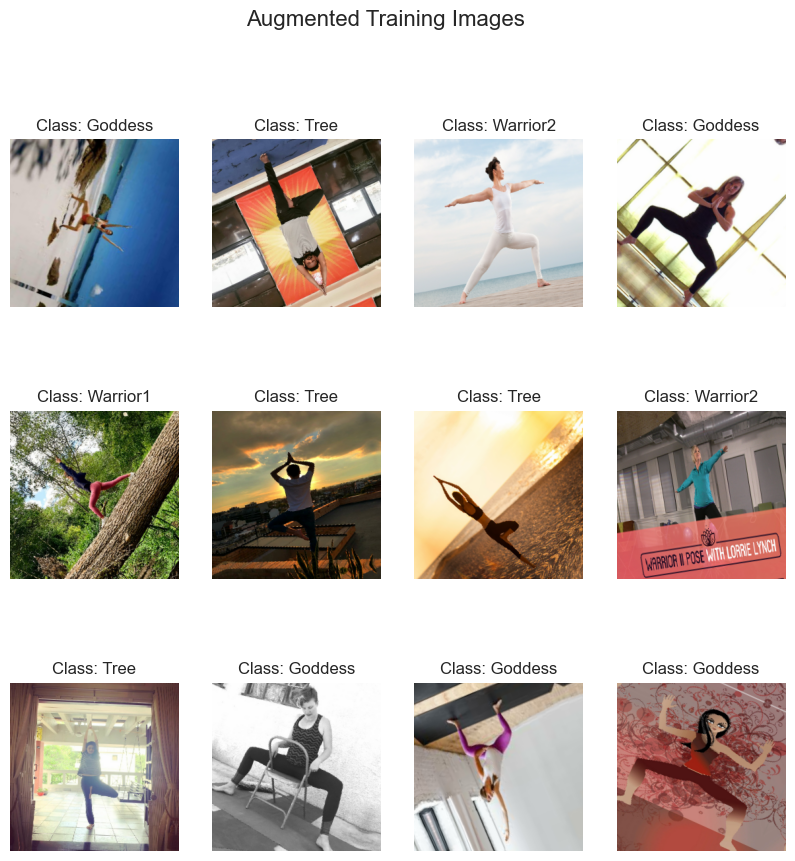

In [30]:
# Plotting a batch of augmented training images
plt.figure(figsize=(10, 10))
for image_batch, label_batch in train_set.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        img = image_batch[i].numpy() * 255  # Convert back to [0, 255] range
        img = img.astype("uint8")
        plt.imshow(img)
        plt.title("Class: " + class_names[label_batch[i].numpy()])
        plt.axis("off")
plt.suptitle("Augmented Training Images", fontsize=16)
plt.show()

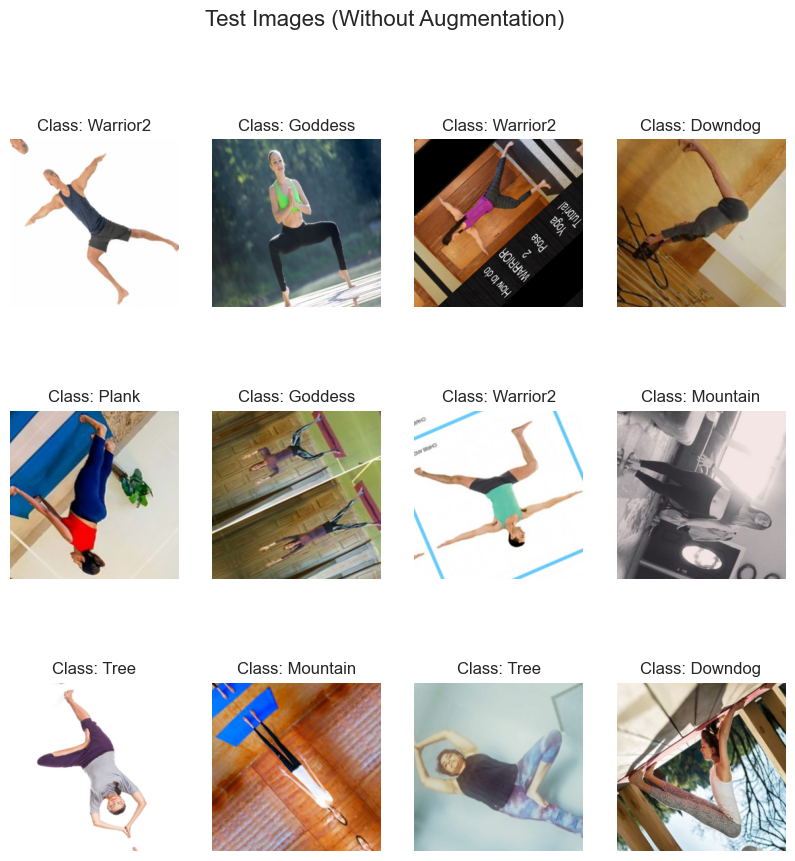

In [31]:
# Plotting a batch of test images (without augmentation)
plt.figure(figsize=(10, 10))
for image_batch, label_batch in test_set.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        img = image_batch[i].numpy() * 255
        img = img.astype("uint8")
        plt.imshow(img)
        plt.title("Class: " + class_names[label_batch[i].numpy()])
        plt.axis("off")
plt.suptitle("Test Images (Without Augmentation)", fontsize=16)
plt.show()

In [32]:
# Save images
print("Saving training images...")
save_images(train_set, TRAIN_SAVE_PATH, augment=True)
print("Training images saved successfully.")

print("Saving test images...")
save_images(test_set, TEST_SAVE_PATH, augment=True)
print("Test images saved successfully.")

print("Dataset preprocessing and saving completed.")

Saving training images...
Training images saved successfully.
Saving test images...
Test images saved successfully.
Dataset preprocessing and saving completed.
